In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

df = pd.DataFrame(pd.read_csv("Covid19IndiaData_30032020.csv"))
print(df.head())


   PatientID   DateAdmit  Age  GenderCode0F1M  StateCode  Foreign1Indian0  \
0          1  2020-01-30   20               0         17                1   
1          2  2020-02-02   38               0         17                1   
2          3  2020-02-03   38               0         17                1   
3          4  2020-03-02   45               1          9                1   
4          5  2020-03-02   24               1         32                1   

   ForeignCode StatusCode  
0           55  Recovered  
1           55  Recovered  
2           55  Recovered  
3            4  Recovered  
4            1  Recovered  


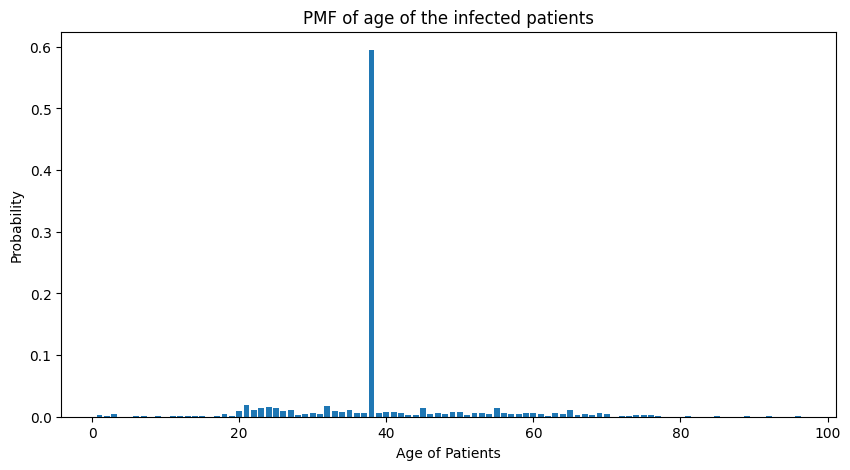

In [3]:
# i)
ages = df['Age'].value_counts(dropna=False).keys().tolist()
patients = df['Age'].value_counts(dropna=False).tolist()
total = len(df.index)
p_ages = []
for i in patients:
    p_ages.append(i / total)

fig = plt.figure(figsize = (10, 5))  
plt.xlabel("Age of Patients")
plt.ylabel("Probability")
plt.title("PMF of age of the infected patients")  
plt.bar(ages,p_ages)
plt.show()

In [4]:
expectation = 0
x = 0
for i in range(len(ages)):
    expectation += (p_ages[i]) * (ages[i])
    x += (p_ages[i]) * (ages[i]) * (ages[i])

variance = x - ((expectation) ** 2)

print("Expectation:", expectation)
print("Variance:", variance)


Expectation: 38.899619771863115
Variance: 127.63859301132015


In [5]:
# iii)
gender = df["GenderCode0F1M"].value_counts(dropna=False)
genderd = gender.to_dict()
pf = genderd[0] / (genderd[0] + genderd[1])
pm = genderd[1] / (genderd[0] + genderd[1])

f = df['Age'][df['GenderCode0F1M'] == 0].to_list()
dic_f = Counter(f)
fem = list(dic_f.keys())
paf = []
Eaf = 0
for i in dic_f.keys():
    x = dic_f[i] / len(f)
    paf.append(x)
    Eaf += x * i

print("Expectation of female:", Eaf)

Expectation of female: 38.97823721436345


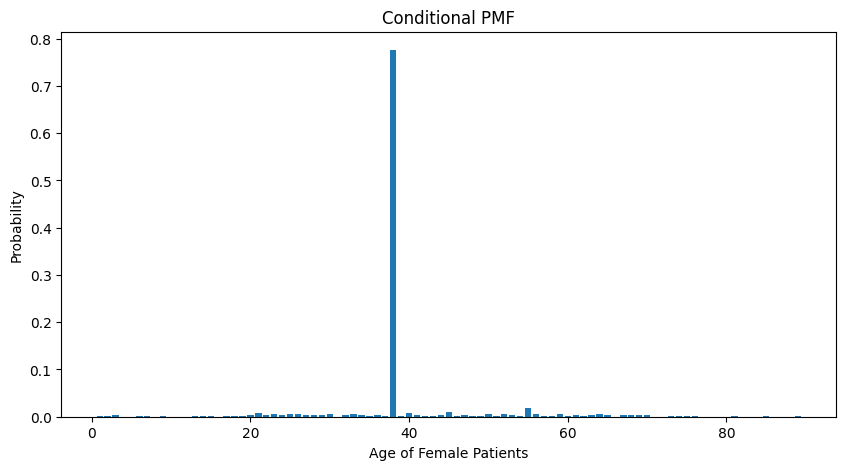

In [6]:
fig = plt.figure(figsize = (10, 5))  
plt.xlabel("Age of Female Patients")
plt.ylabel("Probability")
plt.title("Conditional PMF")  
plt.bar(fem,paf)
plt.show()   


In [7]:
m = df['Age'][df['GenderCode0F1M'] == 1].to_list()
dic_m = Counter(m)
masc = list(dic_m.keys())
pam = []
Eam = 0
for i in dic_m.keys():
    y = dic_m[i] / len(m)
    pam.append(y)
    Eam += y * i

print("Expectation of male:", Eam)


Expectation of male: 38.71717171717172


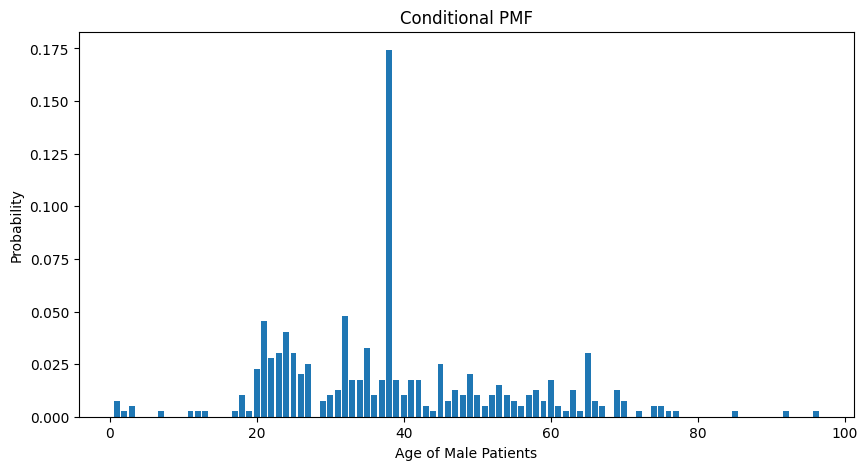

In [8]:
fig = plt.figure(figsize = (10, 5))  
plt.xlabel("Age of Male Patients")
plt.ylabel("Probability")
plt.title("Conditional PMF")  
plt.bar(masc,pam)
plt.show()

In [9]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt


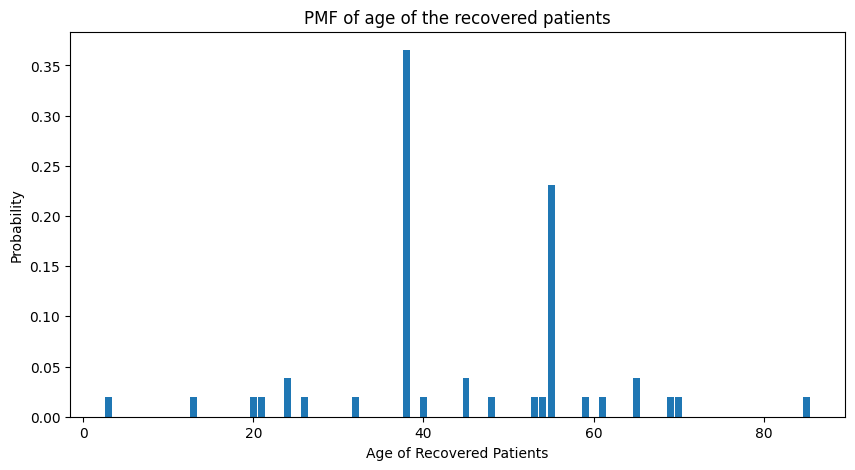

In [10]:
# ii)
recover=df['Age'][df['StatusCode'] == "Recovered"].to_list()
dic_recover=Counter(recover)
sort_recover=collections.OrderedDict(sorted(dic_recover.items()))
probr=[]
for i in dic_recover.values():
    probr.append(i/len(recover))
    
recover_ages=list(dic_recover.keys())

fig = plt.figure(figsize = (10, 5))  
plt.xlabel("Age of Recovered Patients")
plt.ylabel("Probability")
plt.title("PMF of age of the recovered patients")  
plt.bar(recover_ages,probr)
plt.show()

In [11]:
er=0
er2=0
for i in range(len(recover_ages)):
    er+=(recover_ages[i])*probr[i]
    er2+=(recover_ages[i])*(recover_ages[i])*probr[i]

varr=er2-(er*er)
print("E(R):",er)
print("Var(R):",varr)


E(R): 44.3076923076923
Var(R): 225.75147928994124


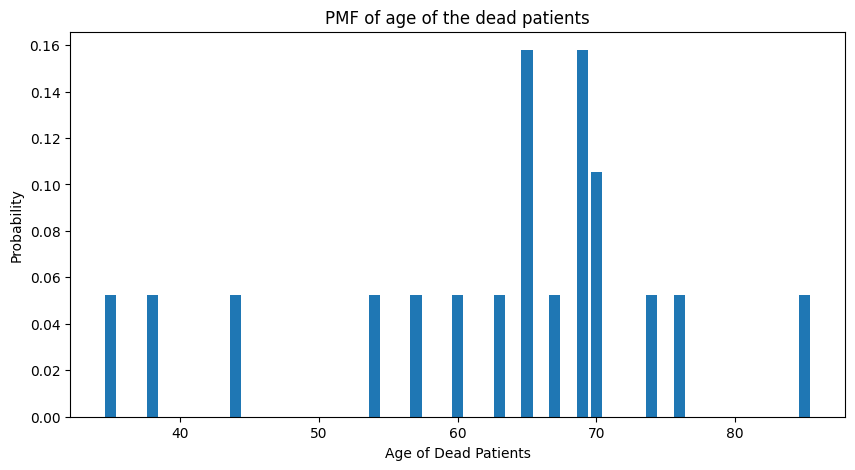

In [12]:
dead=df['Age'][df['StatusCode'] == "Dead"].to_list()
dic_dead=Counter(dead)
sort_dead=collections.OrderedDict(sorted(dic_dead.items()))
probd=[]
for i in dic_dead.values():
    probd.append(i/len(dead))
    
dead_ages=list(dic_dead.keys())

fig = plt.figure(figsize = (10, 5))  
plt.xlabel("Age of Dead Patients")
plt.ylabel("Probability")
plt.title("PMF of age of the dead patients")  
plt.bar(dead_ages,probd)
plt.show()

In [13]:
ed=0
ed2=0
for i in range(len(dead_ages)):
    ed+=(dead_ages[i])*probd[i]
    ed2+=(dead_ages[i])*(dead_ages[i])*probd[i]

vard=ed2-(ed*ed)
print("E(D):",ed)
print("Var(D):",vard)


E(D): 62.89473684210527
Var(D): 152.8310249307474


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
df = pd.DataFrame(pd.read_excel("linton_supp_tableS1_S2_8Feb2020.xlsx"))
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df.drop(df.iloc[:, 8:13], inplace=True, axis=1)
print(df.head())

      ID            ExposureL            ExposureR  \
1  NW001  2019-12-29 00:00:00  2020-01-04 00:00:00   
2  NW002                  NaN  2020-01-06 00:00:00   
3  NW003                  NaN  2020-01-08 00:00:00   
4  NW004                  NaN  2020-01-13 00:00:00   
5  NW006  2020-01-14 00:00:00  2020-01-14 00:00:00   

                   ExposureType                Onset  \
1               Travel to Wuhan  2020-01-03 00:00:00   
2               Travel to Wuhan  2020-01-03 00:00:00   
3  Lives-works-studies in Wuhan  2020-01-05 00:00:00   
4  Lives-works-studies in Wuhan                  NaN   
5             Contact with case  2020-01-18 00:00:00   

  DateCaseFirstSoughtHealthcare DateHospitalizedIsolated DateReportedConfirmed  
1                           NaN      2020-01-11 00:00:00   2020-01-19 00:00:00  
2           2020-01-10 00:00:00      2020-01-10 00:00:00   2020-01-16 00:00:00  
3                           NaN      2020-01-08 00:00:00   2020-01-13 00:00:00  
4           20

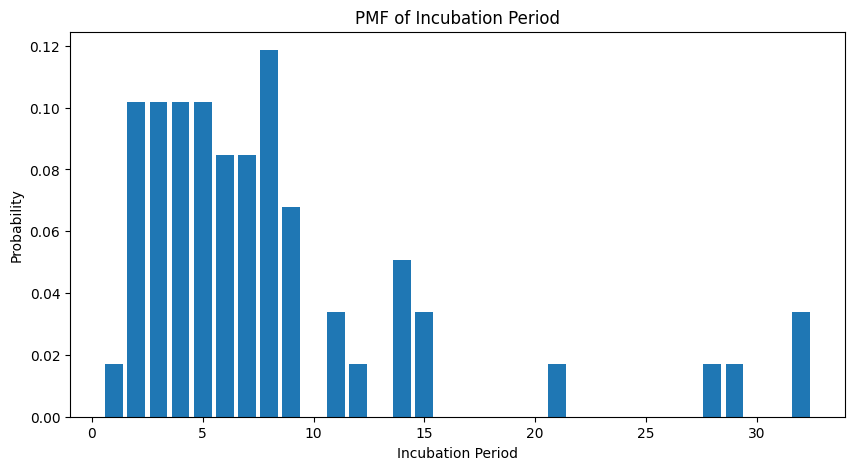

In [17]:
# i)
x = list(df['Onset'] - df['ExposureL'].values)
cleanedList = [i for i in x if str(i) != 'NaT']
dic_i = Counter(cleanedList)
pmf = []
for i in dic_i.values():
    pmf.append(i / len(cleanedList))
days = []
for i in dic_i.keys():
    days.append(i.days)

final = dict(zip(days, pmf))
daysi = list(final.keys())

fig = plt.figure(figsize=(10, 5))
plt.xlabel("Incubation Period")
plt.ylabel("Probability")
plt.title("PMF of Incubation Period")
plt.bar(daysi, pmf)
plt.show()

In [18]:
Ei = 0
Ei2 = 0
for i in final.keys():
    Ei += i * final[i]
    Ei2 += i * i * final[i]

Vari = Ei2 - (Ei * Ei)

print("The mean incubation period is", Ei)
print("The variance of incubation period is", Vari)

The mean incubation period is 8.305084745762711
The variance of incubation period is 50.686584314852084


In [19]:
# ii)
wuhan_e = df['ExposureL'][df['ExposureType'] != "Lives-works-studies in Wuhan"]
wuhan_o = df['Onset'][df['ExposureType'] != "Lives-works-studies in Wuhan"]
wuhan = list(wuhan_o - wuhan_e)
cleanlst = [i for i in wuhan if str(i) != 'NaT']
dic_w = Counter(cleanlst)

pmfw = []
for i in dic_w.values():
    pmfw.append(i / len(cleanlst))
daysw = []
for i in dic_w.keys():
    daysw.append(i.days)

finalw = dict(zip(daysw, pmfw))

Eiw = 0
Ei2w = 0
for i in finalw.keys():
    Eiw += i * finalw[i]
    Ei2w += i * i * finalw[i]

Variw = Ei2w - (Eiw * Eiw)

print("The mean incubation period excluding Wuhan residents is", Eiw)
print("The variance of incubation period excluding Wuhan residents is", Variw)


The mean incubation period excluding Wuhan residents is 8.431034482758623
The variance of incubation period excluding Wuhan residents is 50.62455410225918


In [20]:
# iii)
df2 = pd.read_excel('linton_supp_tableS1_S2_8Feb2020.xlsx', sheet_name=1)
df2 = df2.rename(columns=df2.iloc[0]).drop(df2.index[0])

hod = list(df2['Hospitalization/Isolation'] - df2['Onset'].values)
cleanhod = [i for i in hod if str(i) != 'NaT']
dic_hod = Counter(cleanhod)
pmfhod = []
for i in dic_hod.values():
    pmfhod.append(i / len(cleanhod))
dayshod = []
for i in dic_hod.keys():
    dayshod.append(i.days)

finalhod = dict(zip(dayshod, pmfhod))

hos = list(df['DateHospitalizedIsolated'] - df['Onset'].values)
cleanhos = [i for i in hos if str(i) != 'NaT']
dic_hos = Counter(cleanhos)
pmfhos = []
for i in dic_hos.values():
    pmfhos.append(i / len(cleanhos))
dayshos = []
for i in dic_hos.keys():
    dayshos.append(i.days)

finalhos = dict(zip(dayshos, pmfhos))


xo = list(df2['Death'] - df2['Onset'].values)
cleanxo = [i for i in xo if str(i) != 'NaT']
dic_xo = Counter(cleanxo)
pmfxo = []
for i in dic_xo.values():
    pmfxo.append(i / len(cleanxo))
daysxo = []
for i in dic_xo.keys():
    daysxo.append(i.days)

finalxo = dict(zip(daysxo, pmfxo))

xh = list(df2['Death'] - df2['Hospitalization/Isolation'].values)
cleanxh = [i for i in xh if str(i) != 'NaT']
dic_xh = Counter(cleanxh)
pmfxh = []
for i in dic_xh.values():
    pmfxh.append(i / len(cleanxh))
daysxh = []
for i in dic_xh.keys():
    daysxh.append(i.days)

finalxh = dict(zip(daysxh, pmfxh))

print(finalhod)
print(finalhos)
print(finalxh)
print(finalxo)


{7: 0.24242424242424243, 3: 0.21212121212121213, 5: 0.12121212121212122, 6: 0.06060606060606061, 21: 0.030303030303030304, 9: 0.030303030303030304, 4: 0.12121212121212122, 11: 0.030303030303030304, 10: 0.09090909090909091, 15: 0.030303030303030304, 0: 0.030303030303030304}
{8: 0.02112676056338028, 7: 0.035211267605633804, 3: 0.09154929577464789, 1: 0.18309859154929578, 13: 0.007042253521126761, 0: 0.2323943661971831, 22: 0.007042253521126761, 4: 0.09859154929577464, 2: 0.14788732394366197, 6: 0.07746478873239436, 11: 0.014084507042253521, 5: 0.056338028169014086, 10: 0.014084507042253521, 12: 0.014084507042253521}
{13: 0.05263157894736842, 12: 0.07894736842105263, 1: 0.05263157894736842, 4: 0.10526315789473684, 9: 0.05263157894736842, 20: 0.02631578947368421, 7: 0.07894736842105263, 21: 0.02631578947368421, 16: 0.02631578947368421, 10: 0.07894736842105263, 3: 0.02631578947368421, 8: 0.10526315789473684, 14: 0.02631578947368421, 17: 0.02631578947368421, 5: 0.07894736842105263, 2: 0.0263